### Propensity to Buy (Logistic Regression)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

In [2]:
df = pd.read_excel('Car Sales.xlsx')
df.shape

(34732, 22)

In [3]:
df.head()

,Date,Customer Name,Dealer_Name,Company,Model,Year,Body Style,Engine,Transmission,Color,...,Customer Address,CouncilArea,Phone,Gender,Annual Income,Dealer_Location,Dealer_No,Dealer_Region,Employement_type,Class
0,2016-03-09 00:00:00,Geraldine,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,2015,SUV,DoubleÂ Overhead Camshaft,Auto,Black,...,68 Studley St,Yarra City Council,8264678,Male,13500,44 Walnut St,06457-3834,Middletown,Self employed,0
1,2016-03-12 00:00:00,Gia,C & M Motors Inc,Dodge,Durango,2015,SUV,DoubleÂ Overhead Camshaft,Auto,Black,...,85 Turner St,Yarra City Council,6848189,Male,1480000,4333 Ogden Ave,60504-7114,Aurora,Salaried,0
2,2016-04-02 00:00:00,Gianna,Capitol KIA,Cadillac,Eldorado,2015,Passenger,Overhead Camshaft,Manual,Red,...,25 Bloomburg St,Yarra City Council,7298798,Male,1035000,3 Green Tree Trl,38701-8047,Greenville,Self employed,1
3,2016-04-02 00:00:00,Giselle,Chrysler of Tri-Cities,Toyota,Celica,2016,SUV,Overhead Camshaft,Manual,Pale White,...,18/659 Victoria St,Yarra City Council,6257557,Male,13500,3203 W Marie St,99301-3882,Pasco,Self employed,0
4,2017-04-03 00:00:00,Grace,Chrysler Plymouth,Acura,TL,2015,Hatchback,DoubleÂ Overhead Camshaft,Auto,Red,...,5 Charles St,Yarra City Council,7081483,Male,1465000,6137 S Us-51,53546-9427,Janesville,Self employed,0


In [4]:
# missingvalue
def getNull(df): 
    print(df.isna().sum())

#karaker data
def getDescribe(df):
    print(df.describe(include='all'))

In [5]:
print("Missing Value")
getNull(df)
print('*'*100, end='\n\n')

print('Summary data')
getDescribe(df)

Missing Value
Date                    0
Customer Name           1
Dealer_Name             0
Company                 0
Model                   0
Year                    0
Body Style              0
Engine                  0
Transmission            0
Color                   0
Price in thousands      0
Dealer_Add              0
Customer Address        0
CouncilArea             3
Phone                   0
Gender                  0
Annual Income           0
Dealer_Location         0
Dealer_No               0
Dealer_Region           0
Employement_type      926
Class                   0
dtype: int64
****************************************************************************************************

Summary data
              Date Customer Name  \
count        34732         34731   
unique          78          4209   
top     28/10/2017        Thomas   
freq          1114           183   
mean           NaN           NaN   
std            NaN           NaN   
min            NaN           NaN  

## Preparation Data

In [26]:

def dataTransform(df):
    df = df.loc[:, ['Company','Body Style', 'Transmission', 'Color', 'Gender', 'Annual Income', 'Employement_type', 'Class']]
    #Missing Value
    df['Employement_type'] =  df['Employement_type'].fillna(method ='bfill')
    
    #encoding
    dummy_Company = pd.get_dummies(df['Company'], prefix='Company').iloc[:, 1:]
    Employement_type_map = {'Self employed':1, 'Salaried':0}
    df['Employement_type'] = df['Employement_type'].map(Employement_type_map)
    Gender_map = {'Female':1, 'Male':0}
    df['Gender'] = df['Gender'].map(Gender_map)
    dummy_body_style = pd.get_dummies(df['Body Style'], prefix ='Body_Style').iloc[:, 1:]
    dummy_Transmission = pd.get_dummies(df['Transmission'], prefix='Transmission').iloc[:, 1:]
    dummy_Color = pd.get_dummies(df['Color'], prefix='Color').iloc[:, 1:]
    df = pd.concat([df, dummy_Company, dummy_body_style, dummy_Transmission, dummy_Color], axis=1)
    
    column_hapus = ['Company','Body Style', 'Transmission', 'Color']
    df.drop(column_hapus, axis=1, inplace=True)
    return df

In [27]:
cleandata = dataTransform(df)
print(cleandata)

       Gender  Annual Income  Employement_type  Class  Company_Audi  \
0           0          13500                 1      0             0   
1           0        1480000                 0      0             0   
2           0        1035000                 1      1             0   
3           0          13500                 1      0             0   
4           0        1465000                 1      0             0   
...       ...            ...               ...    ...           ...   
34727       0        1480000                 1      0             0   
34728       0         888000                 1      0             0   
34729       0         705000                 0      1             0   
34730       1        1140000                 1      0             0   
34731       0        1020000                 1      0             0   

       Company_BMW  Company_Buick  Company_Cadillac  Company_Chevrolet  \
0                0              0                 0                  0   

In [28]:
cleandata

,Gender,Annual Income,Employement_type,Class,Company_Audi,Company_BMW,Company_Buick,Company_Cadillac,Company_Chevrolet,Company_Chrysler,...,Company_Toyota,Company_Volkswagen,Company_Volvo,Body_Style_Hatchback,Body_Style_Passenger,Body_Style_SUV,Body_Style_Sedan,Transmission_Manual,Color_Pale White,Color_Red
0,0,13500,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1480000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1035000,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
3,0,13500,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,0,1465000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34727,0,1480000,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
34728,0,888000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
34729,0,705000,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
34730,1,1140000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


### Model

In [29]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#split data
data_clean = dataTransform(df)
X = data_clean.loc[:, data_clean.columns!='Class']
y = data_clean.loc[:, 'Class']

X=sm.add_constant(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

#model 
model = sm.Logit(y_train, X_train, random_state=0)
hasil = model.fit()
print(hasil.summary())

Optimization terminated successfully.
         Current function value: 0.692037
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                24312
Model:                          Logit   Df Residuals:                    24272
Method:                           MLE   Df Model:                           39
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                0.001575
Time:                        11:15:59   Log-Likelihood:                -16825.
converged:                       True   LL-Null:                       -16851.
Covariance Type:            nonrobust   LLR p-value:                   0.06563
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1079      0.090      1.198      0.231      -0.069       0.284

In [30]:
stat_df=pd.DataFrame({'coefficients':hasil.params, 'p-value': hasil.pvalues, 'odds': np.exp(hasil.params), 'probablility': np.exp(hasil.params)/(1+np.exp(hasil.params))})
stat_df

,coefficients,p-value,odds,probablility
const,1.078856e-01,0.231075,1.113920,0.526945
Gender,-2.497675e-02,0.408923,0.975333,0.493756
Annual Income,-3.564406e-08,0.047517,1.000000,0.500000
Employement_type,5.471471e-02,0.033700,1.056239,0.513675
Company_Audi,-1.429044e-01,0.235982,0.866837,0.464335
Company_BMW,-1.186318e-01,0.254606,0.888135,0.470377
Company_Buick,9.481703e-03,0.938754,1.009527,0.502370
Company_Cadillac,-5.200435e-02,0.633506,0.949325,0.487002
Company_Chevrolet,-1.086113e-01,0.229358,0.897079,0.472874
Company_Chrysler,9.835786e-02,0.312320,1.103358,0.524570


### significant parameters

In [31]:
# Condition for significant parameters
significant_params=stat_df[stat_df['p-value']<=0.05].index
print('Total number of parameters: %s '%len(X.keys()) )
print('Number of Significant Parameters: %s'%(len(significant_params)))
stat_df.loc[significant_params].sort_values('odds', ascending=False)['odds']

Total number of parameters: 40 
Number of Significant Parameters: 4


Employement_type        1.056239
Annual Income           1.000000
Body_Style_Hatchback    0.919956
Body_Style_Passenger    0.883351
Name: odds, dtype: float64

### Prediction and Accuracy

##### Prediction

In [11]:
y_pred = hasil.predict(X_test)
y_pred

32443    0.488910
8909     0.512157
9712     0.494577
18       0.477406
13368    0.509047
           ...   
7092     0.509722
5062     0.495762
4660     0.469483
19392    0.481954
25840    0.542241
Length: 10420, dtype: float64

#### Confusion Matrix

Text(33.0, 0.5, 'Actual Output')

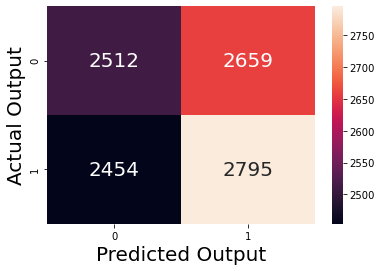

In [12]:
# Getting confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Converting y into binary. Here 0.5 is the threshold
opt_thr=0.5
y_pred=hasil.predict(X_test)
y_pred= np.where(y_pred>opt_thr,1,0)

cm= confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Predicted Output', fontsize=20)
plt.ylabel('Actual Output', fontsize=20)

In [13]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      5171
           1       0.51      0.53      0.52      5249

    accuracy                           0.51     10420
   macro avg       0.51      0.51      0.51     10420
weighted avg       0.51      0.51      0.51     10420

